In [68]:
# Import libraries
import numpy as np
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

Using device: cuda


In [69]:
import pickle

# 指定文件路径
filename = "semantic_analysis_enhanced_epoch_100.pkl"

# 打开文件
with open(filename, 'rb') as f:
    data = pickle.load(f)
#这是第一个层级问题的提取的表示信息的整个句子分词的嵌入信息
layer1_data = data['layer1']['representations']['lstm_final_state']
# print(layer1_data)
#这是第一个问题
print(layer1_data[0])
#这是第二个
print(layer1_data[1])
#这是第三个
print(layer1_data[2])



[-0.05096021 -0.09779338  0.3033673   0.34181997 -0.22476967 -0.06146845
  0.06569211 -0.2220522   0.05416263 -0.3015385  -0.14778242  0.07406682
 -0.04534043  0.16736776 -0.08329945 -0.17902659 -0.1139106   0.16646674
  0.18959397 -0.1120457  -0.03165961  0.03165681 -0.06694941  0.03587619
 -0.02833189 -0.33502293  0.1443593  -0.09657241  0.09340218  0.14407273]
[ 0.04588386 -0.01699972  0.4591831   0.42959306 -0.36378494  0.28538406
 -0.02190266 -0.15294382 -0.38536814 -0.2576387  -0.3033836  -0.07834155
  0.2657343   0.38012135 -0.29342324  0.00062455 -0.30037573  0.23402813
  0.25245348 -0.44219643 -0.14683408  0.39556944 -0.45014316  0.00455142
 -0.28693426 -0.3662287   0.38023794 -0.4432553   0.05819063  0.30006775]
[ 0.02534355  0.04707675  0.3155894   0.45044082 -0.39679152  0.25161457
 -0.00650535 -0.0969058  -0.27272367 -0.23675062 -0.20918252 -0.03848098
  0.29814902  0.33232    -0.26090455  0.03197147 -0.23262915  0.32814804
  0.16991968 -0.38471463 -0.02624378  0.49598536 

In [70]:
layer1_data = data['layer1']['representations']['lstm_final_state']
test = []
for i in range(0,3):
    test.append(layer1_data[i])
print((test[0]+test[1]+test[2])/3)
layer2_data = data['layer2']['representations']['lstm_final_state']
test = []
for i in range(0,3):
    test.append(layer2_data[i])
print((test[0]+test[1]+test[2])/3)

[ 0.00675573 -0.02257211  0.35937992  0.40728462 -0.3284487   0.15851006
  0.01242803 -0.1573006  -0.20130973 -0.26530924 -0.22011618 -0.01425191
  0.17284763  0.29326972 -0.21254241 -0.04881019 -0.21563847  0.24288099
  0.20398904 -0.31298557 -0.06824582  0.3077372  -0.2816051   0.0690105
 -0.16945672 -0.33381328  0.28478098 -0.27233198  0.05118793  0.17984442]
[ 3.7965715e-02 -1.9922294e-04  4.2640337e-01  3.9512789e-01
 -3.6070597e-01  2.5900316e-01 -1.8080043e-02 -1.2289491e-01
 -3.2883763e-01 -2.4606605e-01 -2.5722507e-01 -3.4921736e-02
  2.8470591e-01  3.1342700e-01 -2.7089426e-01  3.4697477e-03
 -2.4111283e-01  2.7589008e-01  2.3539017e-01 -3.5411155e-01
 -1.0616436e-01  4.3025443e-01 -3.9054194e-01  6.4861082e-02
 -2.7391779e-01 -3.5478199e-01  3.2821655e-01 -3.6181283e-01
  3.6000665e-02  2.2387636e-01]


In [71]:
import pickle
import numpy as np
import os

# 定义 item 和 layer 的列表
items = ['Pine', 'Oak', 'Rose', 'Daisy', 'Robin', 'Canary', 'Sunfish', 'Salmon']
layers = ['layer1', 'layer2', 'layer3', 'layer4']

# 初始化存储每 100 epoch 结果的字典
epoch_results = {}

# 遍历保存的结果文件（每 100 个 epoch 保存一次）
for epoch in range(100, 5001, 100):  # 假设文件名为 semantic_analysis_enhanced_epoch_{epoch}.pkl
    filename = f"semantic_analysis_enhanced_epoch_{epoch}.pkl"
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        continue
    
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    
    # 初始化当前 epoch 的字典
    epoch_layer_positions = {layer: {item: [] for item in items} for layer in layers}
    epoch_comprehensive_positions = {item: [] for item in items}
    
    # 遍历每个 layer
    for layer in layers:
        layer_data = results[layer]
        questions = layer_data['questions']
        lstm_final_states = layer_data['representations']['lstm_final_state']  # 形状: (num_questions, hidden_dim)
        
        # 对每个 item 提取相关问题的 LSTM final state
        for item in items:
            # 筛选与当前 item 相关的问题
            item_indices = [i for i, q in enumerate(questions) if q.startswith(item)]
            if item_indices:  # 如果有相关问题
                item_states = lstm_final_states[item_indices]  # 形状: (num_item_questions, hidden_dim)
                avg_state = np.mean(item_states, axis=0)  # 平均值 (hidden_dim,)
                
                # 保存到分层位置
                epoch_layer_positions[layer][item] = avg_state
                
                # 保存到综合位置
                epoch_comprehensive_positions[item].append(avg_state)
    
    # 计算综合位置（所有层的平均值）
    for item in items:
        if epoch_comprehensive_positions[item]:
            epoch_comprehensive_positions[item] = np.mean(epoch_comprehensive_positions[item], axis=0)
        else:
            epoch_comprehensive_positions[item] = np.zeros(lstm_final_states.shape[1])  # 如果没有值，填零
    
    # 保存当前 epoch 的结果
    epoch_results[epoch] = {
        "layer_positions": epoch_layer_positions,
        "comprehensive_positions": epoch_comprehensive_positions,
    }

# 打印示例结果
print("Epoch 100 综合位置示例:")
for item, pos in epoch_results[100]["comprehensive_positions"].items():
    print(f"{item}: {pos}")

print("\nEpoch 100 分层位置示例:")
for layer, positions in epoch_results[100]["layer_positions"].items():
    print(f"\n{layer}:")
    for item, pos in positions.items():
        print(f"  {item}: {pos}")


Epoch 100 综合位置示例:
Pine: [ 0.03372415 -0.01252061  0.4529171   0.4616288  -0.4029617   0.2793449
 -0.01214997 -0.14075312 -0.32417768 -0.26752454 -0.2754648  -0.02762624
  0.307073    0.35112435 -0.28381604 -0.01184961 -0.27430922  0.3093555
  0.25670552 -0.3884593  -0.11003542  0.46387014 -0.40221298  0.08073963
 -0.2919548  -0.36760932  0.34890145 -0.3764013   0.04370239  0.23259005]
Oak: [ 0.03443024 -0.02937382  0.4627949   0.4908749  -0.42631075  0.2869351
 -0.0228925  -0.16065975 -0.3408851  -0.2645509  -0.29080325 -0.01103233
  0.3271889   0.37384495 -0.29896948 -0.02518251 -0.3088601   0.31980422
  0.26801464 -0.40211722 -0.11791442  0.4882875  -0.44522092  0.08461121
 -0.31153852 -0.3971989   0.35473418 -0.39431983  0.04251643  0.22290853]
Rose: [ 3.5419151e-02 -4.6878822e-02  5.5071884e-01  5.4831672e-01
 -4.6124673e-01  3.5584468e-01 -1.6942807e-04 -1.6957895e-01
 -3.8036999e-01 -3.1675509e-01 -3.2292607e-01 -1.8484933e-02
  3.7780407e-01  4.0944257e-01 -3.3567038e-01 -2.2402

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import os
import matplotlib
print(matplotlib.matplotlib_fname())  # 打印 Matplotlib 的配置文件路径
print(matplotlib.get_cachedir())     # 打印字体缓存目录

# 创建保存结果的文件夹
output_folder = "epoch_clustering_plots"
os.makedirs(output_folder, exist_ok=True)

# 提取 epochs 和 items
epochs_to_plot = range(100, 5001, 100)  # 每 100 个 epoch
items = ['Pine', 'Oak', 'Rose', 'Daisy', 'Robin', 'Canary', 'Sunfish', 'Salmon']

# 为每个 epoch 绘制单独的聚类图并保存
for epoch in epochs_to_plot:
    # 获取当前 epoch 的综合位置表示
    item_positions = np.array([epoch_results[epoch]["comprehensive_positions"][item] for item in items])
    
    # 计算层次聚类的链接矩阵
    linkage_matrix = linkage(item_positions, method='ward')  # 使用 Ward 方法计算链接矩阵
    
    # 创建聚类图
    plt.figure(figsize=(8, 6))
    dendrogram(
        linkage_matrix,
        labels=items,  # 使用 item 名称作为标签
        leaf_rotation=90,
        leaf_font_size=10,
        color_threshold=0.7 * max(linkage_matrix[:, 2])  # 设置颜色分割阈值
    )
    plt.title(f"Epoch {epoch}")
    plt.ylabel("Euclidean distance")
    
    # 保存聚类图
    save_path = os.path.join(output_folder, f"epoch_{epoch}.png")
    plt.savefig(save_path, dpi=300)
    plt.close()  # 关闭当前绘图，释放内存

    print(f"Saved clustering plot for Epoch {epoch} to {save_path}")


s:\Anaconda\envs\1016FP\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\Rimersa\.matplotlib
Saved clustering plot for Epoch 100 to epoch_clustering_plots\epoch_100.png
Saved clustering plot for Epoch 200 to epoch_clustering_plots\epoch_200.png
Saved clustering plot for Epoch 300 to epoch_clustering_plots\epoch_300.png
Saved clustering plot for Epoch 400 to epoch_clustering_plots\epoch_400.png
Saved clustering plot for Epoch 500 to epoch_clustering_plots\epoch_500.png
Saved clustering plot for Epoch 600 to epoch_clustering_plots\epoch_600.png
Saved clustering plot for Epoch 700 to epoch_clustering_plots\epoch_700.png
Saved clustering plot for Epoch 800 to epoch_clustering_plots\epoch_800.png
Saved clustering plot for Epoch 900 to epoch_clustering_plots\epoch_900.png
Saved clustering plot for Epoch 1000 to epoch_clustering_plots\epoch_1000.png
Saved clustering plot for Epoch 1100 to epoch_clustering_plots\epoch_1100.png
Saved clustering plot for Epoch 1200 to epoch_clustering

Plot saved to pca_trajectories_representation_layer.png


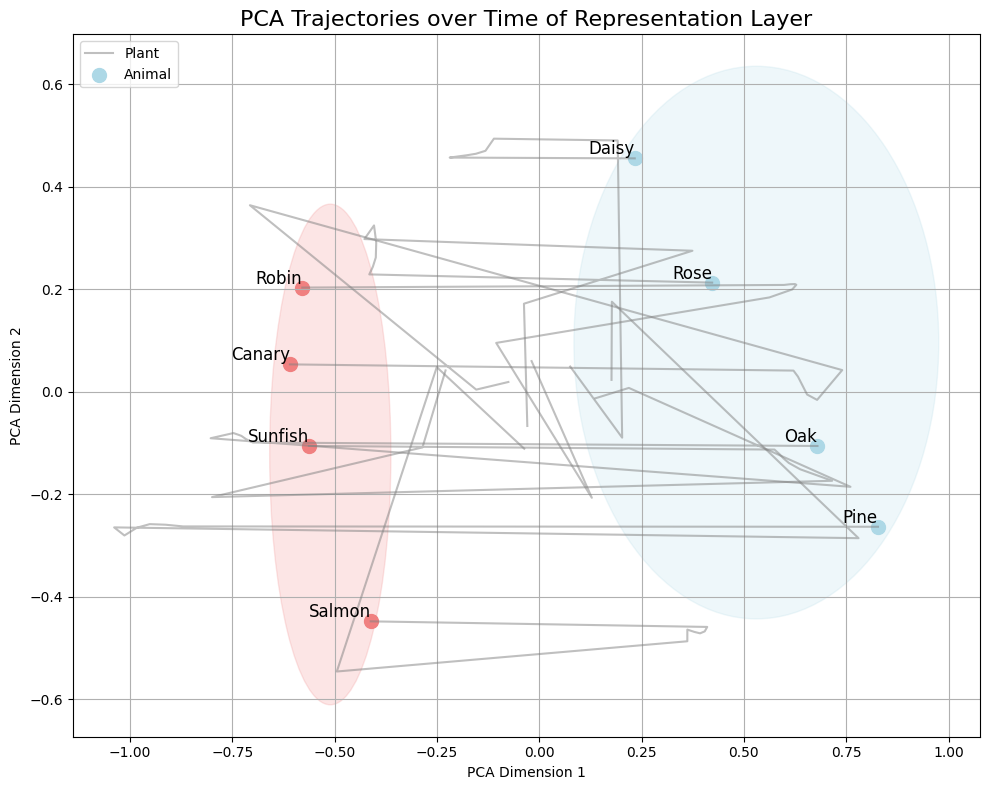

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Assuming epoch_results contains the comprehensive positions for each epoch
# Replace this with your actual data loading step
items = ['Pine', 'Oak', 'Rose', 'Daisy', 'Robin', 'Canary', 'Sunfish', 'Salmon']
final_epoch = 5000
epochs = range(500, final_epoch + 1, 500)

# Extract the embeddings for all epochs
all_embeddings = {
    epoch: np.array([epoch_results[epoch]["comprehensive_positions"][item] for item in items])
    for epoch in epochs
}

# Manual PCA Implementation
def compute_pca(data, n_components=2):
    # Center the data
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Compute covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]

    # Project data onto top eigenvectors
    reduced_data = np.dot(centered_data, top_eigenvectors)
    return reduced_data

# Compute PCA for all epochs
pca_projections = {
    epoch: compute_pca(embeddings, n_components=2)
    for epoch, embeddings in all_embeddings.items()
}

# Group items into categories for coloring
categories = {
    "Plant": ["Pine", "Oak", "Rose", "Daisy"],
    "Animal": ["Robin", "Canary", "Sunfish", "Salmon"]
}
colors = {
    "Plant": "lightblue",
    "Animal": "lightcoral"
}

# Create the plot
# Create the plot
plt.figure(figsize=(10, 8))

# Plot each item's trajectory over epochs
for i, item in enumerate(items):
    # Extract the PCA positions across epochs for the item
    trajectory = np.array([pca_projections[epoch][i] for epoch in epochs])
    
    # Plot the trajectory as a smooth line
    plt.plot(
        trajectory[:, 0], trajectory[:, 1],
        color="gray", alpha=0.5, linewidth=1.5
    )
    
    # Plot the final position as a point
    category = "Plant" if item in categories["Plant"] else "Animal"
    plt.scatter(
        trajectory[-1, 0], trajectory[-1, 1],
        color=colors[category], label=category if i == 0 or i == 4 else None,
        s=100, alpha=1.0
    )

# Overlay the final epoch's category zones
final_embeddings_2d = pca_projections[final_epoch]
for category, items_in_category in categories.items():
    indices = [items.index(item) for item in items_in_category]
    category_points = final_embeddings_2d[indices]
    
    # Add background color
    x_min, x_max = category_points[:, 0].min(), category_points[:, 0].max()
    y_min, y_max = category_points[:, 1].min(), category_points[:, 1].max()
    ellipse = Ellipse(
        xy=((x_min + x_max) / 2, (y_min + y_max) / 2),
        width=(x_max - x_min) * 1.5,
        height=(y_max - y_min) * 1.5,
        color=colors[category],
        alpha=0.2
    )
    plt.gca().add_patch(ellipse)

# Annotate the final points with the item names
for i, item in enumerate(items):
    final_position = pca_projections[final_epoch][i]
    plt.text(
        final_position[0], final_position[1],
        item, fontsize=12, ha="right", va="bottom"
    )

# Add labels and legend
plt.title("PCA Trajectories over Time of Representation Layer", fontsize=16)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(categories.keys(), loc="upper left")
plt.grid(True)

# Save the plot to a file
plt.tight_layout()
output_file = "pca_trajectories_representation_layer.png"
plt.savefig(output_file, dpi=300)
print(f"Plot saved to {output_file}")


C:\Users\Rimersa\AppData\Local\Temp\ipykernel_4860\2715345969.py:112: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = Ellipse(


Plot saved to pca_trajectories_representation_layer_with_subcategories.png


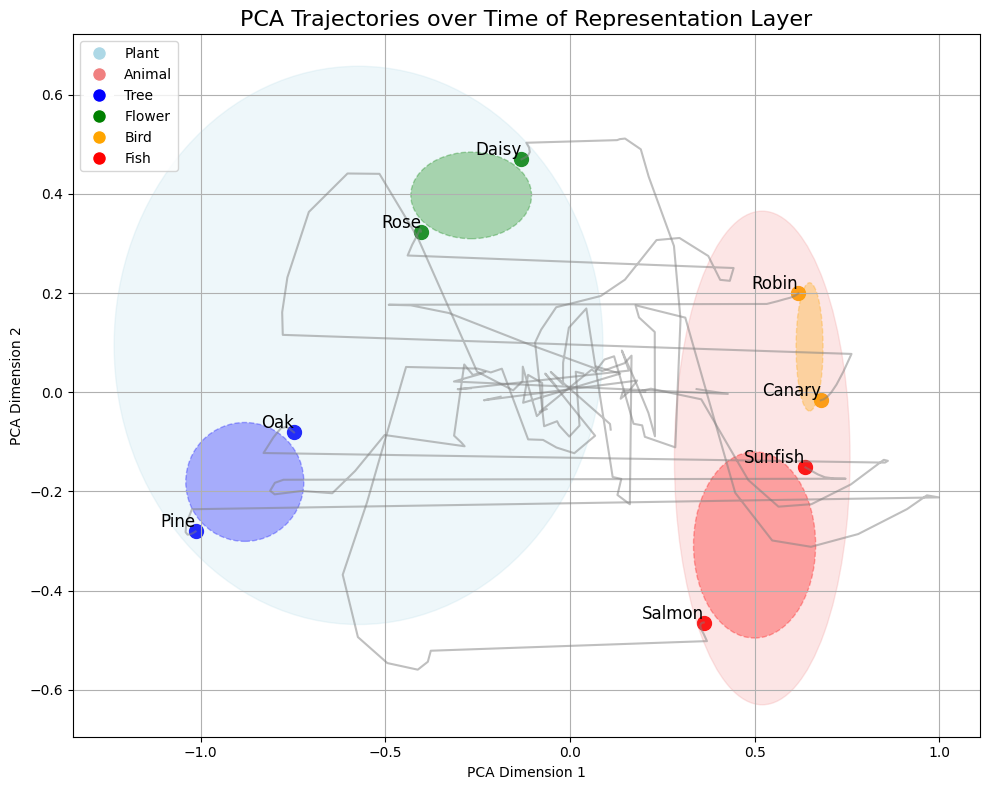

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Assuming `epoch_results` contains the comprehensive positions for each epoch
# Replace this with your actual data loading step
items = ['Pine', 'Oak', 'Rose', 'Daisy', 'Robin', 'Canary', 'Sunfish', 'Salmon']
final_epoch = 2500
epochs = range(100, final_epoch + 1, 100)

# Extract the embeddings for all epochs
all_embeddings = {
    epoch: np.array([epoch_results[epoch]["comprehensive_positions"][item] for item in items])
    for epoch in epochs
}

# Manual PCA Implementation
def compute_pca(data, n_components=2):
    # Center the data
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Compute covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]

    # Project data onto top eigenvectors
    reduced_data = np.dot(centered_data, top_eigenvectors)
    return reduced_data

# Compute PCA for all epochs
pca_projections = {
    epoch: compute_pca(embeddings, n_components=2)
    for epoch, embeddings in all_embeddings.items()
}

# Group items into categories for coloring
categories = {
    "Plant": ["Pine", "Oak", "Rose", "Daisy"],
    "Animal": ["Robin", "Canary", "Sunfish", "Salmon"]
}
subcategories = {
    "Tree": ["Pine", "Oak"],
    "Flower": ["Rose", "Daisy"],
    "Bird": ["Robin", "Canary"],
    "Fish": ["Sunfish", "Salmon"]
}
colors = {
    "Plant": "lightblue",
    "Animal": "lightcoral",
    "Tree": "blue",
    "Flower": "green",
    "Bird": "orange",
    "Fish": "red"
}

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each item's trajectory over epochs
for i, item in enumerate(items):
    # Extract the PCA positions across epochs for the item
    trajectory = np.array([pca_projections[epoch][i] for epoch in epochs])
    
    # Plot the trajectory as a smooth line
    plt.plot(
        trajectory[:, 0], trajectory[:, 1],
        color="gray", alpha=0.5, linewidth=1.5
    )
    
    # Plot the final position as a point
    for category, sub_items in subcategories.items():
        if item in sub_items:
            plt.scatter(
                trajectory[-1, 0], trajectory[-1, 1],
                color=colors[category], label=category if i == items.index(sub_items[0]) else None,
                s=100, alpha=1.0
            )

# Overlay the final epoch's category zones
final_embeddings_2d = pca_projections[final_epoch]
for category, items_in_category in categories.items():
    indices = [items.index(item) for item in items_in_category]
    category_points = final_embeddings_2d[indices]
    
    # Add background color for main categories
    x_min, x_max = category_points[:, 0].min(), category_points[:, 0].max()
    y_min, y_max = category_points[:, 1].min(), category_points[:, 1].max()
    ellipse = Ellipse(
        xy=((x_min + x_max) / 2, (y_min + y_max) / 2),
        width=(x_max - x_min) * 1.5,
        height=(y_max - y_min) * 1.5,
        color=colors[category],
        alpha=0.2
    )
    plt.gca().add_patch(ellipse)

# Overlay the subcategory zones
for subcategory, items_in_subcategory in subcategories.items():
    indices = [items.index(item) for item in items_in_subcategory]
    subcategory_points = final_embeddings_2d[indices]

    # Add background color for subcategories
    x_min, x_max = subcategory_points[:, 0].min(), subcategory_points[:, 0].max()
    y_min, y_max = subcategory_points[:, 1].min(), subcategory_points[:, 1].max()
    ellipse = Ellipse(
        xy=((x_min + x_max) / 2, (y_min + y_max) / 2),
        width=(x_max - x_min) * 1.2,
        height=(y_max - y_min) * 1.2,
        color=colors[subcategory],
        alpha=0.3, linestyle="--", edgecolor=colors[subcategory]
    )
    plt.gca().add_patch(ellipse)

# Annotate the final points with the item names
for i, item in enumerate(items):
    final_position = pca_projections[final_epoch][i]
    plt.text(
        final_position[0], final_position[1],
        item, fontsize=12, ha="right", va="bottom"
    )

# Add labels and legend
plt.title("PCA Trajectories over Time of Representation Layer", fontsize=16)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# Manually set legend for categories and subcategories
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Plant"], markersize=10, label='Plant'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Animal"], markersize=10, label='Animal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Tree"], markersize=10, label='Tree'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Flower"], markersize=10, label='Flower'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Bird"], markersize=10, label='Bird'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["Fish"], markersize=10, label='Fish'),
]
plt.legend(handles=legend_elements, loc="upper left")

plt.grid(True)

# Save the plot to a file
plt.tight_layout()
output_file = "pca_trajectories_representation_layer_with_subcategories.png"
plt.savefig(output_file, dpi=300)
print(f"Plot saved to {output_file}")


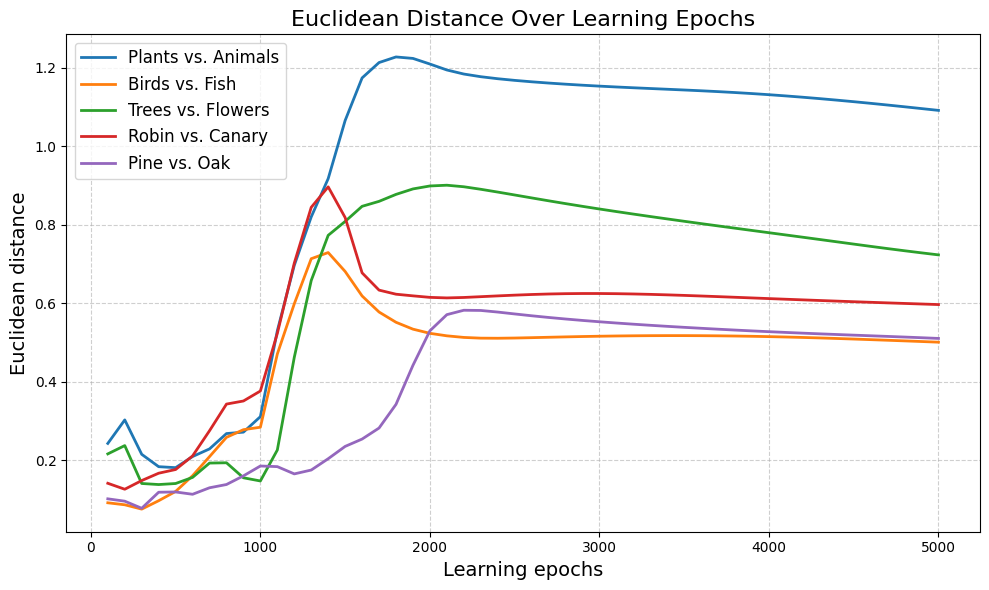

Plot saved to euclidean_distance_epochs.png


In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 示例：项目对
pairs = {
    "Plants vs. Animals": (["Pine", "Oak", "Rose", "Daisy"], ["Robin", "Canary", "Sunfish", "Salmon"]),
    "Birds vs. Fish": (["Robin", "Canary"], ["Sunfish", "Salmon"]),
    "Trees vs. Flowers": (["Pine", "Oak"], ["Rose", "Daisy"]),
    "Robin vs. Canary": (["Robin"], ["Canary"]),
    "Pine vs. Oak": (["Pine"], ["Oak"]),
}

# 示例：所有 epochs 和 PCA 降维结果
epochs = range(100, 5001, 100)
all_embeddings = {
    epoch: np.array([epoch_results[epoch]["comprehensive_positions"][item] for item in items])
    for epoch in epochs
}

# 计算欧几里得距离
def compute_euclidean_distance(embeddings, group1, group2):
    group1_indices = [items.index(item) for item in group1]
    group2_indices = [items.index(item) for item in group2]
    group1_embeddings = embeddings[group1_indices]
    group2_embeddings = embeddings[group2_indices]
    # 计算两组的中心点
    group1_center = np.mean(group1_embeddings, axis=0)
    group2_center = np.mean(group2_embeddings, axis=0)
    # 返回欧几里得距离
    return np.linalg.norm(group1_center - group2_center)

# 初始化结果字典
distance_over_epochs = {pair: [] for pair in pairs}

# 遍历每个 epoch 计算距离
for epoch in epochs:
    embeddings = all_embeddings[epoch]
    for pair, (group1, group2) in pairs.items():
        distance = compute_euclidean_distance(embeddings, group1, group2)
        distance_over_epochs[pair].append(distance)

# 绘制变化趋势图
plt.figure(figsize=(10, 6))

# 为每个项目对绘制曲线
for pair, distances in distance_over_epochs.items():
    plt.plot(epochs, distances, label=pair, linewidth=2)

# 图形美化
plt.title("Euclidean Distance Over Learning Epochs", fontsize=16)
plt.xlabel("Learning epochs", fontsize=14)
plt.ylabel("Euclidean distance", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 保存并显示图形
plt.tight_layout()
output_file = "euclidean_distance_epochs.png"
plt.savefig(output_file, dpi=300)
plt.show()

print(f"Plot saved to {output_file}")
